In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from matplotlib import cm
import re

In [2]:
df=pd.read_csv('../data/clean_review_laptops.csv')

In [3]:
df.head()

,Rating,verified,reviewerID,asin,reviewerName,unixReviewTime,category,description,title,also_buy,...,rank,also_view,main_cat,similar_item,date,price,review_text,time,rating_class,clean_text
0,5,True,A36O9HQS83TUX6,1254875778,Rafael Antonio herrera,1412985600,"['Electronics', 'Computers &amp; Accessories',...",['REFURBISHED - Hynix 2GB DDR3 Memory SO-DIMM ...,Hynix 2GB DDR3 Memory SO-DIMM 204pin PC3-10600...,[],...,"['>#3,132 in Computers &amp; Accessories &gt; ...","['B004K4MZ1E', 'B004K4IULS', 'B005LDLP8W', 'B0...",Computers,"class=""a-bordered a-horizontal-stripes a-spa...","October 30, 2012",$8.95,Five Stars excellent salesman problem solved,2014-10-11,good,five star excellent salesman problem solve
1,5,True,A358J4WU5B0Y9Q,1254875778,G4M,1409184000,"['Electronics', 'Computers &amp; Accessories',...",['REFURBISHED - Hynix 2GB DDR3 Memory SO-DIMM ...,Hynix 2GB DDR3 Memory SO-DIMM 204pin PC3-10600...,[],...,"['>#3,132 in Computers &amp; Accessories &gt; ...","['B004K4MZ1E', 'B004K4IULS', 'B005LDLP8W', 'B0...",Computers,"class=""a-bordered a-horizontal-stripes a-spa...","October 30, 2012",$8.95,"Great RAM, Got them to be used with SuperMicro...",2014-08-28,good,great ram get use supermicro receive time grea...
2,5,True,A1QSBRR1IFFSD0,1254875778,Tech nerd,1388102400,"['Electronics', 'Computers &amp; Accessories',...",['REFURBISHED - Hynix 2GB DDR3 Memory SO-DIMM ...,Hynix 2GB DDR3 Memory SO-DIMM 204pin PC3-10600...,[],...,"['>#3,132 in Computers &amp; Accessories &gt; ...","['B004K4MZ1E', 'B004K4IULS', 'B005LDLP8W', 'B0...",Computers,"class=""a-bordered a-horizontal-stripes a-spa...","October 30, 2012",$8.95,Works perfectly. No issues here. Used this RAM...,2013-12-27,good,work perfectly no issue use ram double current...
3,5,True,A2UGZCGCYPBMNA,1254875778,Larry Butler,1373500800,"['Electronics', 'Computers &amp; Accessories',...",['REFURBISHED - Hynix 2GB DDR3 Memory SO-DIMM ...,Hynix 2GB DDR3 Memory SO-DIMM 204pin PC3-10600...,[],...,"['>#3,132 in Computers &amp; Accessories &gt; ...","['B004K4MZ1E', 'B004K4IULS', 'B005LDLP8W', 'B0...",Computers,"class=""a-bordered a-horizontal-stripes a-spa...","October 30, 2012",$8.95,Good memory at a great price 2GB really peps u...,2013-07-11,good,good memory great price gb really peps win net...
4,1,True,A3H150XFJ7S4KE,1254875778,93TransAmLT1,1367193600,"['Electronics', 'Computers &amp; Accessories',...",['REFURBISHED - Hynix 2GB DDR3 Memory SO-DIMM ...,Hynix 2GB DDR3 Memory SO-DIMM 204pin PC3-10600...,[],...,"['>#3,132 in Computers &amp; Accessories &gt; ...","['B004K4MZ1E', 'B004K4IULS', 'B005LDLP8W', 'B0...",Computers,"class=""a-bordered a-horizontal-stripes a-spa...","October 30, 2012",$8.95,"This comany is a joke, DON'T buy from them unl...",2013-04-29,bad,comany joke not buy unless like problems amama...


### Total reviews per rating

In [4]:
df_count=df.groupby('Rating').count()['reviewerID']
df_count

Rating
1     995
2     638
3    1110
4    2602
5    9882
Name: reviewerID, dtype: int64

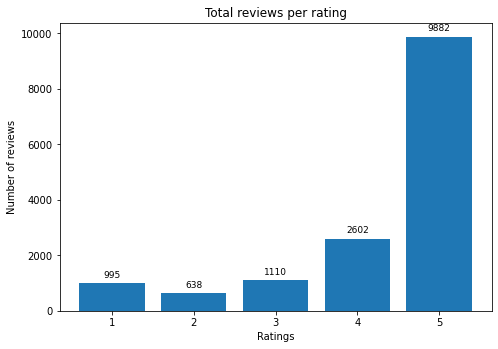

In [5]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ratings = list(df_count.index)
count = list(df_count)
ax.bar(ratings,count)
for bar in ax.patches: 
    ax.annotate(format(bar.get_height(), '.0f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=9, xytext=(0, 8), 
                   textcoords='offset points') 
plt.title('Total reviews per rating')
plt.xlabel('Ratings')
plt.ylabel('Number of reviews')
plt.show()

### Top 20 reviewed brands

In [6]:
df_brand=df.groupby('brand').count()['reviewerID'].sort_values(ascending=False)
df_brand[:20]

brand
StarTech           1537
APC                1415
Cyber Acoustics     781
Koss                777
Klipsch             763
Tripp Lite          614
PNY                 530
Targus              529
Creative            526
3M                  517
Kensington          484
C&E                 454
Kingston            425
TRENDnet            370
AVerMedia           364
Linksys             360
PCToys              296
Crucial             278
Belkin              253
Canon               220
Name: reviewerID, dtype: int64

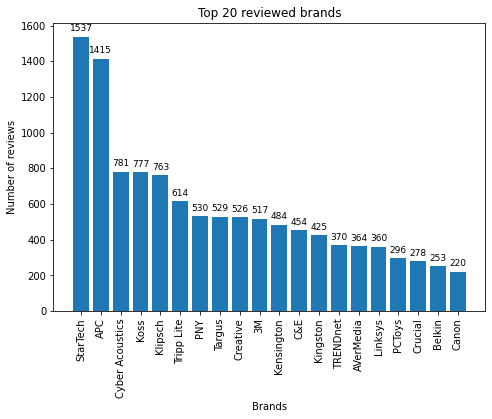

In [7]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
brands = list(df_brand.index[:20])
count = list(df_brand)[:20]
ax.bar(brands,count)
for bar in ax.patches: 
    ax.annotate(format(bar.get_height(), '.0f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=9, xytext=(0, 8), 
                   textcoords='offset points') 
plt.xticks(rotation=90)
plt.title('Top 20 reviewed brands')
plt.xlabel('Brands')
plt.ylabel('Number of reviews')
plt.show()

### Top 20 average ratings per brand

In [8]:
df_mean_rating = df.groupby('brand').agg({'Rating':'mean'}).sort_values(by=['Rating'],ascending=False)

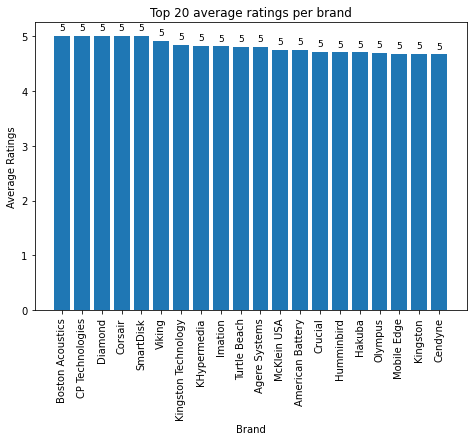

In [9]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
brands = list(df_mean_rating.index[:20])
count = list(df_mean_rating['Rating'])[:20]
ax.bar(brands,count)
for bar in ax.patches: 
    ax.annotate(format(bar.get_height(), '.0f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=9, xytext=(0, 8), 
                   textcoords='offset points') 
plt.xticks(rotation=90)
plt.title('Top 20 average ratings per brand')
plt.xlabel('Brand')
plt.ylabel('Average Ratings')
plt.show()

In [10]:
count = list(df_mean_rating)[:20]
count

['Rating']

In [11]:
df.columns

Index(['Rating', 'verified', 'reviewerID', 'asin', 'reviewerName',
       'unixReviewTime', 'category', 'description', 'title', 'also_buy',
       'brand', 'feature', 'rank', 'also_view', 'main_cat', 'similar_item',
       'date', 'price', 'review_text', 'time', 'rating_class', 'clean_text'],
      dtype='object')

### Top 20 reviewed products

In [12]:
df_product=df.groupby('title').count()['reviewerID'].sort_values(ascending=False)

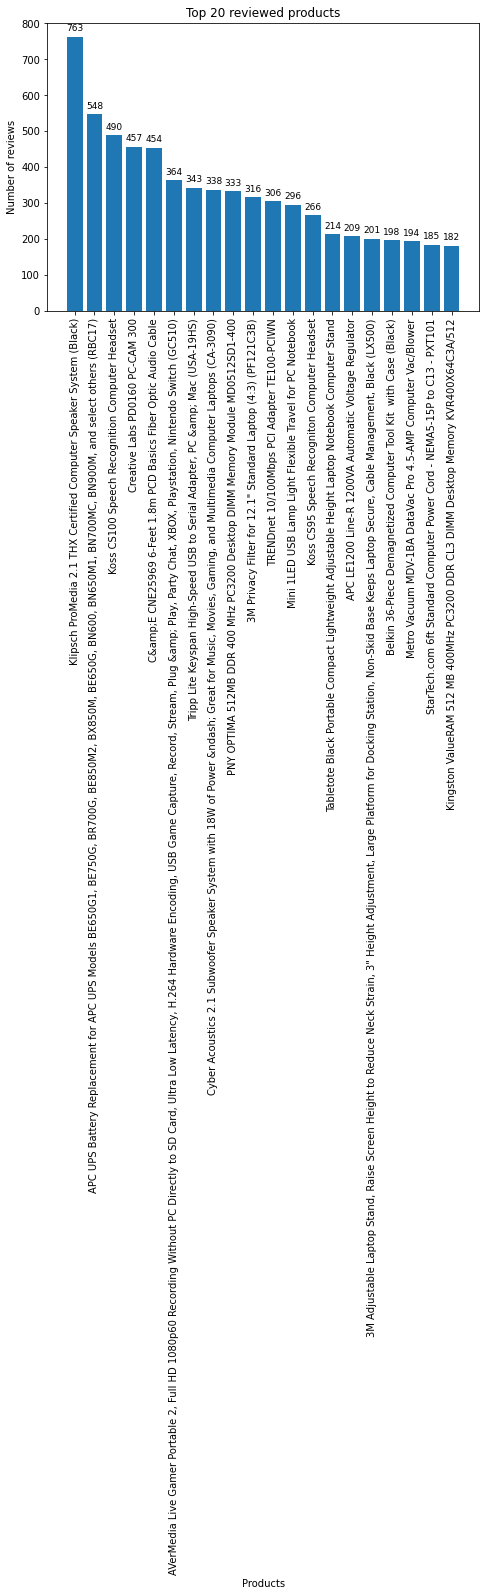

In [13]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
products = list(df_product.index[:20])
count = list(df_product)[:20]
ax.bar(products,count)
for bar in ax.patches: 
    ax.annotate(format(bar.get_height(), '.0f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=9, xytext=(0, 8), 
                   textcoords='offset points') 
plt.xticks(rotation=90)
plt.title('Top 20 reviewed products')
plt.xlabel('Products')
plt.ylabel('Number of reviews')
plt.show()

In [14]:
df_verified=df.groupby('verified').count()['reviewerID'].sort_values(ascending=False)
df_verified

verified
True     12864
False     2363
Name: reviewerID, dtype: int64

In [15]:
df_rating_class=df.groupby('rating_class').count()['reviewerID'].sort_values(ascending=False)
df_rating_class

rating_class
good    13594
bad      1633
Name: reviewerID, dtype: int64

### Disitribution of Categories

In [16]:
df['category'] = df['category'].apply(eval)

In [17]:
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

In [18]:
df_category = pd.DataFrame(to_1D(df['category']).value_counts(),columns=['count']).reset_index()
df_category.rename({'index': 'category'},axis=1,inplace=True)
df_category['category'] = df_category['category'].map(lambda x: re.sub(r'&amp;', '&', x))
df_category.loc[df_category['count'] < 1000, 'category'] = 'Others'
df_category.drop(df_category[df_category['category'] =='Electronics'].index,inplace=True)

others_count=df_category[df_category['category'] == 'Others']['count'].sum()
df_category.drop(df_category[df_category['category'] =='Others'].index,inplace=True)
df_category.loc[len(df_category.index)] = ['Others',others_count]
df_category


,category,count
1,Computers & Accessories,7431
2,Computers & Accessories,5031
3,Computer Accessories & Peripherals,4031
4,Audio & Video Accessories,3672
5,Computer Components,3386
6,Internal Components,3305
7,Computer Accessories & Peripherals,2425
8,Computer Speakers,2107
9,Accessories & Supplies,1549
10,Memory,1516


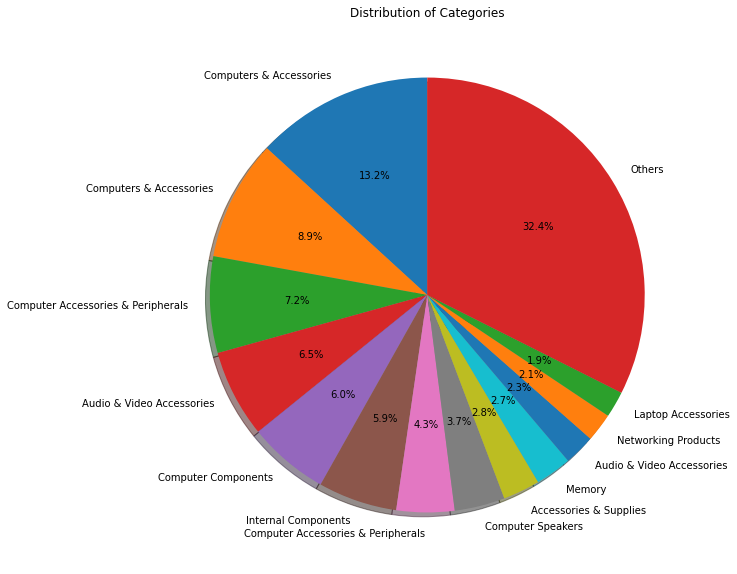

In [19]:
category = df_category['category']
sizes = df_category['count']
#fig1, ax1 = plt.subplots()
plt.figure(figsize=(50, 10))
cs=cm.Set1(np.arange(len(category))/10.)
plt.pie(sizes, labels=category, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Distribution of Categories')
plt.show()

### Ratings for Top 10 reviewed brands

In [20]:
df_rating_brand=df.loc[df['brand'].isin(df_brand[:10].index)]
df_rating_brand=pd.DataFrame(df_rating_brand.groupby(['brand', 'Rating']).size(),columns=[''])
df_rating_brand

brand           Rating      
3M              1         35
                2         29
                3         61
                4        133
                5        259
APC             1         92
                2         54
                3         54
                4        190
                5       1025
Creative        1         10
                2          9
                3         30
                4         76
                5        401
Cyber Acoustics 1         68
                2         57
                3        105
                4        159
                5        392
Klipsch         1         58
                2         42
                3         51
                4         93
                5        519
Koss            1         60
                2         41
                3         81
                4        148
                5        447
PNY             1         24
                2          5
                3         20
                4         68
                5        413
StarTech        1         69
                2         34
                3         72
                4        218
                5       1144
Targus          1         25
                2         23
                3         36
                4        108
                5        337
Tripp Lite      1         32
                2         13
                3         29
                4         70
                5        470

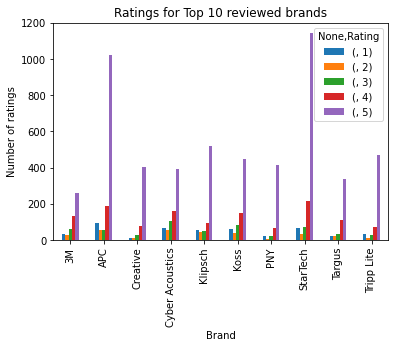

In [21]:
df_rating_brand.unstack().plot(kind='bar')
plt.title('Ratings for Top 10 reviewed brands')
plt.xlabel('Brand')
plt.ylabel('Number of ratings')
plt.show()

In [22]:
df_brand_class = df.groupby(['brand','rating_class']).agg({'Rating':'sum'}).sort_values(by=['brand','rating_class'],ascending=False)
df_brand_class

Rating
brand    rating_class        
Zalman   good              18
ZCMYFA   good             312
         bad                9
Yamakasi good             107
         bad               15
...                       ...
APC      bad              200
ADS Tech good              20
         bad                2
3M       good            2010
         bad               93

[247 rows x 1 columns]

<AxesSubplot:xlabel='brand'>

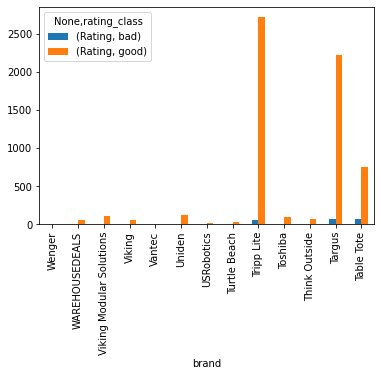

In [23]:
df_brand_class[10:30].unstack().plot(kind='bar', stacked=False)

In [24]:
df.columns

Index(['Rating', 'verified', 'reviewerID', 'asin', 'reviewerName',
       'unixReviewTime', 'category', 'description', 'title', 'also_buy',
       'brand', 'feature', 'rank', 'also_view', 'main_cat', 'similar_item',
       'date', 'price', 'review_text', 'time', 'rating_class', 'clean_text'],
      dtype='object')

### Distribution of main catgeories

In [25]:
df['main_cat'] = df['main_cat'].map(lambda x: re.sub(r'&amp;', '&', x))
df_main_category = pd.DataFrame(df['main_cat'].value_counts()).reset_index()
df_main_category.columns=['category','count']
df_main_category.drop(df_main_category[df_main_category['category'] =='All Electronics'].index,inplace=True)
df_main_category


,category,count
1,Home Audio & Theater,2497
2,Computers,2221
3,Office Products,425
4,Camera & Photo,272
5,"Arts, Crafts & Sewing",93
6,Cell Phones & Accessories,93
7,Amazon Home,83
8,Musical Instruments,23
9,Car Electronics,17
10,Sports & Outdoors,13


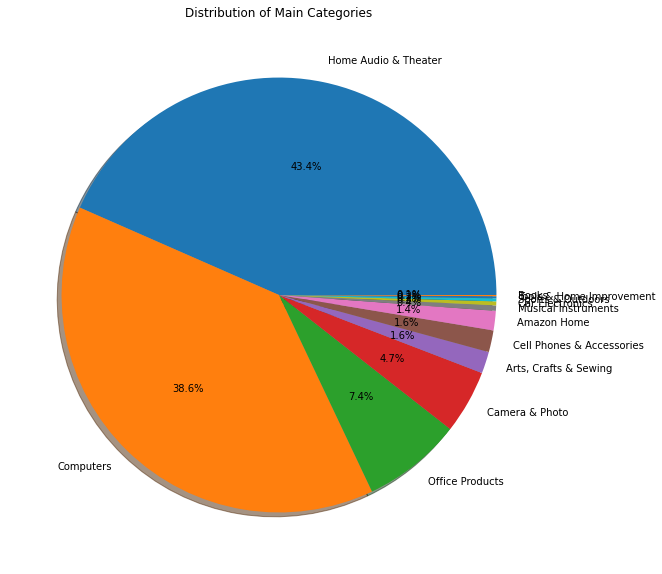

In [26]:
category = df_main_category['category']
sizes = df_main_category['count']
#fig1, ax1 = plt.subplots()
explode = (0, 0, 0, 0, 0, 0,0,1.0,1.0,1.0,1.0,1.0)
plt.figure(figsize=(30, 10))
plt.pie(sizes, labels=category, autopct='%1.1f%%',
        shadow=True, startangle=0)
plt.title('Distribution of Main Categories')
plt.show()

In [27]:
df['rank'] = df['rank'].map(lambda x: re.sub(r'&amp;', '&', x))
df['rank'] = df['rank'].map(lambda x: re.sub(r'&gt;', ',', x))

In [28]:
len(explode)

12